In [1]:
from IPython.display import display, HTML
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
# Globals
columns_to_drop=[]

In [3]:
# Function to read CSV file into a pandas DataFrame
def read_csv_into_dataframe(csv_path):
    df = pd.read_csv(csv_path)
    df = df.drop(columns=columns_to_drop, axis=1)
    return df


In [9]:
# Paths to the CSV files
path = r'C:\Users\kowle\Projects\ClimateData\life-expectancy\life-expectancy.csv'
#local_csv_path = "/path/to/local/storage/local_read_results.csv"

# Read CSV files into pandas DataFrames
df = read_csv_into_dataframe(path)
#local_dataframe = read_csv_into_dataframe(local_csv_path)

# Display the DataFrames (you can modify or process them as needed)
print("Life Expectancy:")
print(df.head())

# for doing EDA, it's nice to see what you're dealing with using the head() function


Life Expectancy:
        Entity Code  Year  Period life expectancy at birth - Sex: all - Age: 0
0  Afghanistan  AFG  1950                                            27.7275  
1  Afghanistan  AFG  1951                                            27.9634  
2  Afghanistan  AFG  1952                                            28.4456  
3  Afghanistan  AFG  1953                                            28.9304  
4  Afghanistan  AFG  1954                                            29.2258  


In [5]:
# Clean the dataframes by dropping rows with NaN
df.info()
df.dropna()
print('After dropping all rows with any NaN values in any column')
df.info()
# you can see how many rows we lose by comparing the output of df.info() before and after the dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20755 entries, 0 to 20754
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               20755 non-null  object 
 1   Code                                                 19061 non-null  object 
 2   Year                                                 20755 non-null  int64  
 3   Period life expectancy at birth - Sex: all - Age: 0  20755 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 648.7+ KB
After dropping all rows with any NaN values in any column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20755 entries, 0 to 20754
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   E

In [6]:
# filter to G20
g20_countries = [
    'Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 
    'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 
    'South Korea', 'Turkey', 'United Kingdom', 'United States'
]

g20_df = df[df['Entity'].isin(g20_countries)]

print("This is the list of G20 Nations")
print(g20_df['Entity'].unique())



This is the list of G20 Nations
['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'France' 'Germany'
 'India' 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Russia' 'Saudi Arabia'
 'South Africa' 'South Korea' 'Turkey' 'United Kingdom' 'United States']


In [7]:
# Step 1: Further filter to create the list of G7 countries
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']

# Step 2: Filter the DataFrame for G7 countries
g7_df = g20_df[g20_df['Entity'].isin(g7_countries)]

# Step 3: Check the filtered DataFrame
print(g7_df['Entity'].unique())  # Verify that only G7 countries are included


['Canada' 'France' 'Germany' 'Italy' 'Japan' 'United Kingdom'
 'United States']


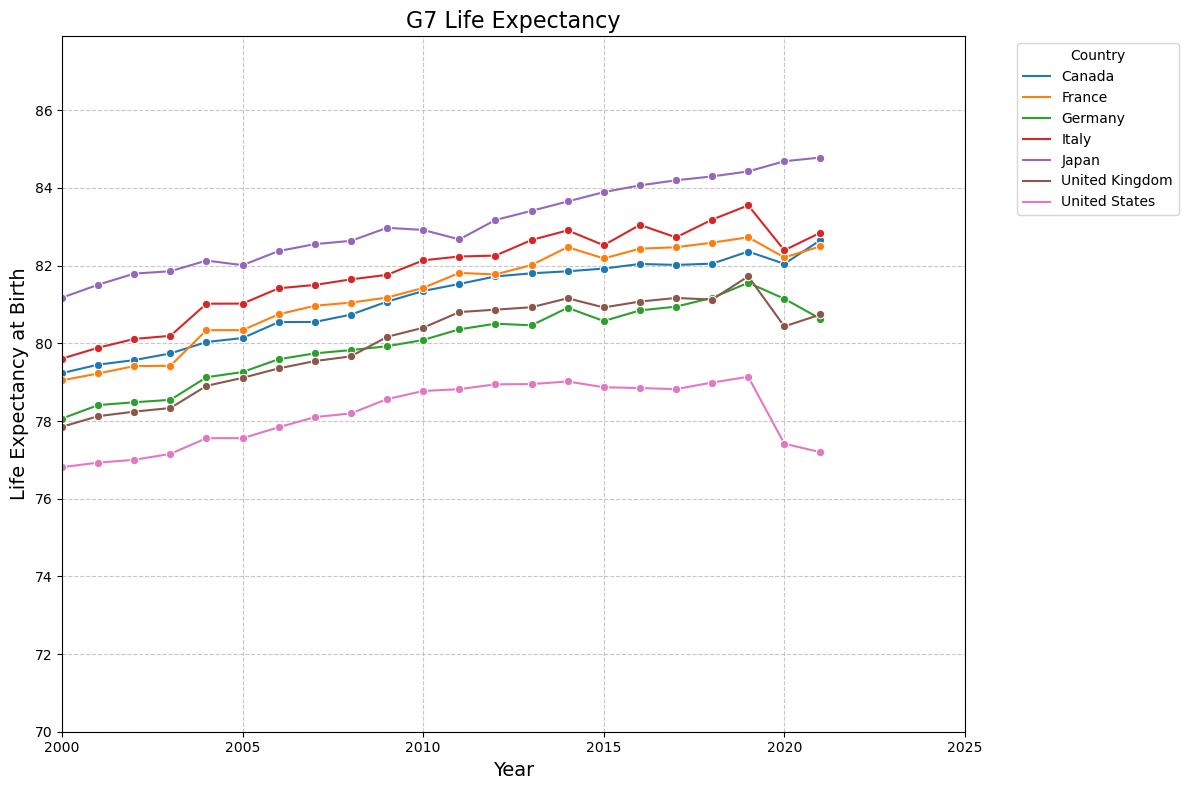

In [15]:
# Plot using seaborn
plt.figure(figsize=(12, 8))
sb.lineplot(
    data=g7_df,
    x='Year',
    y='Period life expectancy at birth - Sex: all - Age: 0',
    hue='Entity',  # Group by country
    marker='o'
)

# Add labels and title
plt.title("G7 Life Expectancy", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Life Expectancy at Birth", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xlim(2000,2025)
plt.ylim(70,None)

# Show the plot
plt.show()

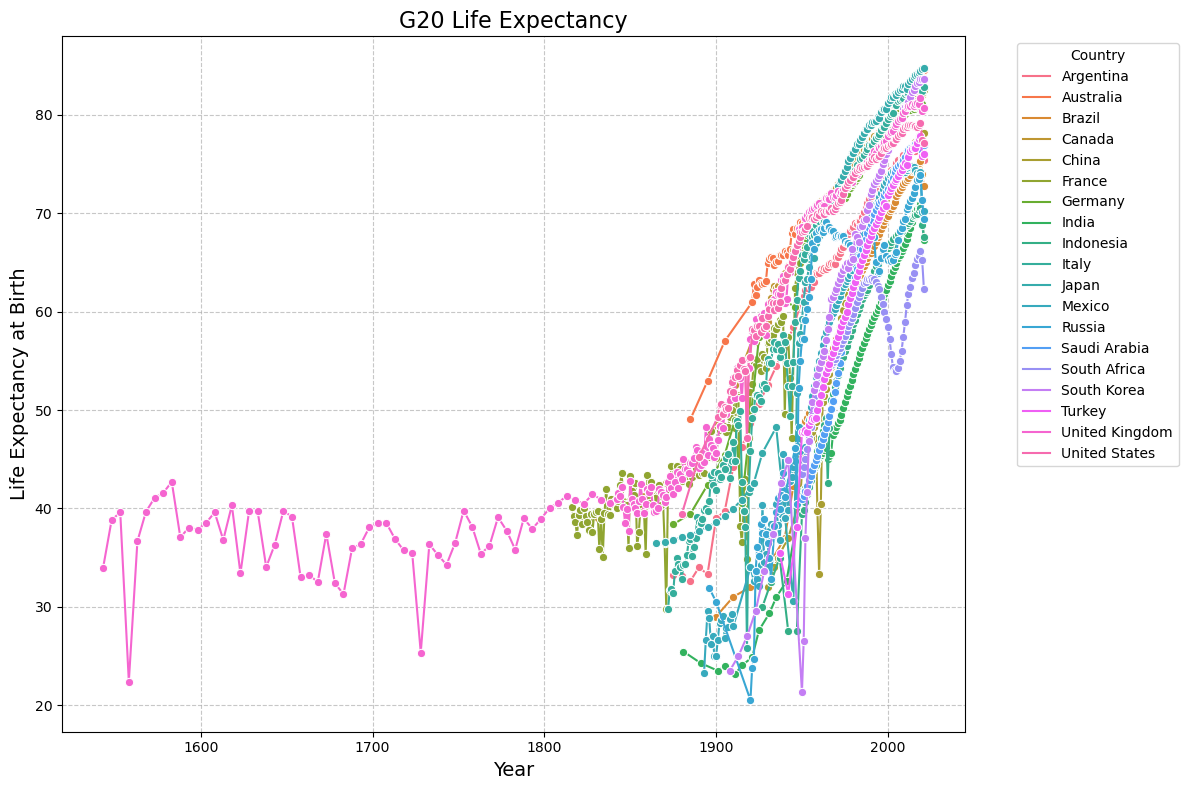

In [18]:
# Plot using seaborn
plt.figure(figsize=(12, 8))
sb.lineplot(
    data=g20_df,
    x='Year',
    y='Period life expectancy at birth - Sex: all - Age: 0',
    hue='Entity',  # Group by country
    marker='o'
)

# Add labels and title
plt.title("G20 Life Expectancy", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Life Expectancy at Birth", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.xlim(2000,2025)
#plt.ylim(40,None)

# Show the plot
plt.show()